In [25]:
import seaborn as sns
import pandas as pd
import datetime
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
import geoplotlib
import geoplotlib.utils as utils
import geopy.distance
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['PROJ_LIB'] = 'C:/Users/HP ENVY/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'

#df = pd.read_csv('haha.csv')
df = pd.read_csv('earthquakes1970-2014.csv')
df.head(1)

,datetime,lat,lon,depth,magnitude,magtype,nbstations,gap,distance,rms,source,eventid
0,1970/01/04 17:00:40.20,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09


In [26]:
from datetime import datetime

datetime_object = datetime.strptime('2014/01/13 04:01:04.69', '%Y/%m/%d %H:%M:%S.%f')
#print(np.datetime64(datetime_object))

#mengubah datetime+tabel jarak
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

a = df.values
tabel_jarak = np.zeros((a.shape[0],6))

for i in range(a.shape[0]):
    tabel_jarak[i,0] = to_integer(datetime.strptime(a[i,0], '%Y/%m/%d %H:%M:%S.%f'))
tabel_jarak[:,1:3] = a[:,1:3]
print(tabel_jarak)

[[ 1.9700104e+07  2.4139000e+01  1.0250300e+02  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 1.9700106e+07 -9.6280000e+00  1.5145800e+02  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 1.9700108e+07 -3.4741000e+01  1.7856800e+02  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 2.0131217e+07  2.0763500e+01  1.4675990e+02  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 2.0140101e+07 -1.3877900e+01  1.6724340e+02  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 2.0140113e+07  1.9001400e+01 -6.6847800e+01  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


In [27]:
#list lempeng
import matplotlib.pyplot as plt
%matplotlib inline
import shapefile   

shpFilePath = "PB2002_plates.shp"  
listx=[]
listy=[]
test = shapefile.Reader(shpFilePath)
lempeng=test.shapeRecords()
for sr in lempeng:
    #print(len(sr.shape.points))
    for xNew,yNew in sr.shape.points:
        listx.append(xNew)
        listy.append(yNew)
#plt.scatter(listx,listy)
#plt.show()

len(lempeng)

54

In [28]:
import pickle
file = open("tabel_jarak2", "rb")
tabel_jarak = pickle.load(file)
file.close()

In [29]:
import statistics as st
stdev = st.stdev(tabel_jarak[:,5])
mean = st.mean(tabel_jarak[:,5])

jarak_normal0 = mean+stdev
jarak_normal1 = mean+stdev*2
jarak_normal2 = mean+stdev*3

#print(mean, stdev)
#print(68,mean-stdev,mean+stdev)
print(95,mean-stdev*2,mean+stdev*2)
#print(99.7,mean-stdev*3,mean+stdev*3)

95 -300.7686979633267 558.9924234255943


In [30]:
jarak = []
for i in range(tabel_jarak.shape[0]):
    jarak.append([tabel_jarak[i,1], tabel_jarak[i,2], tabel_jarak[i,5]])
    #if tabel_jarak[i,5] > jarak_normal:
#print(np.asarray(jarak))

jarak= np.asarray(jarak)

In [31]:
counter = 0
jarak = []
for i in range(tabel_jarak.shape[0]):
    if tabel_jarak[i,5] > jarak_normal1:
        #lol.append([tabel_jarak[i,0], tabel_jarak[i,1], tabel_jarak[i,2], tabel_jarak[i,5]])
        jarak.append([tabel_jarak[i,1], tabel_jarak[i,2], tabel_jarak[i,5]])
        print(tabel_jarak[i,1:3],tabel_jarak[i,5])
        counter+=1
#print (counter)
jarak = np.asarray(jarak)

[-21.981 126.682] 1270.1519619216692
[43.034 47.089] 667.5787939719465
[50.169 91.252] 937.5404834187217
[42.475 78.758] 1023.7779749765812
[37.824 55.876] 915.1022774968443
[41.453 79.259] 958.9252123166974
[35.462 98.166] 821.9000955532377
[  65.9 -164. ] 1186.0349336607512
[32.389 92.119] 560.09200525118
[39.905 77.168] 714.1085227904326
[-0.463 -4.841] 821.7628638197242
[  76.786 -107.038] 1475.6625790348846
[  64.89 -159.49] 948.7696304493373
[  19.8653 -155.1528] 3472.411381473202
[35.178 86.481] 874.7628271484214
[73.302 55.161] 1362.7659646436302
[-26.09  84.28] 950.4187854629791
[45.136 94.034] 958.1971683556164
[-0.278 12.917] 1789.182014798805
[70.817 54.063] 1511.227928769821
[  42.0628 -112.5247] 960.4936114520644
[33.093 92.924] 596.2992928968869
[  44.6883 -110.6037] 1169.6501240870018
[-22.126 126.721] 1286.601085791316
[70.843 53.69 ] 1498.415906782561
[73.351 55.078] 1357.0531941995987
[  19.339  -155.0043] 3505.0738590205187
[40.311 63.773] 989.2095196512545
[40.167 

In [32]:
#CARA BIKIN PANDAS/DATAFRAME anomali

import pandas as pd 
dataE = {'lat':jarak[:,0],'lon':jarak[:,1]} #intialise data of lists. 
dfeeE = pd.DataFrame(dataE) #Create DataFrame 
dfeeE # Print the output.

#plt.scatter(jarak[:,2],jarak[:,1])

,lat,lon
0,-21.9810,126.6820
1,43.0340,47.0890
2,50.1690,91.2520
3,42.4750,78.7580
4,37.8240,55.8760
5,41.4530,79.2590
6,35.4620,98.1660
7,65.9000,-164.0000
8,32.3890,92.1190
9,39.9050,77.1680


In [34]:
#CARA BIKIN PANDAS/DATAFRAME DF

import pandas as pd 
data = {'lat':df["lat"],'lon':df["lon"]} #intialise data of lists. 
dfee = pd.DataFrame(data) #Create DataFrame 
dfee #Print the output.

#plt.scatter(lol[:,2],lol[:,1])

,lat,lon
0,24.1390,102.5030
1,-9.6280,151.4580
2,-34.7410,178.5680
3,6.8250,126.7370
4,60.2800,-152.6600
5,-25.8000,-177.3490
6,42.5190,142.9660
7,7.0170,-104.2980
8,-12.5790,166.3700
9,15.5320,-99.4840


In [36]:
a = tabel_jarak[:,1:3]
b = jarak[:,0:2]

#print(tabel_jarak[:,1:3])
#print(lol[:,0:2])

c = []
for elemen in a:
    if elemen not in b:
        c.append(elemen)
        
print(np.array(c))
d = np.array(c)

[[ 24.139  102.503 ]
 [ -9.628  151.458 ]
 [-34.741  178.568 ]
 ...
 [ 20.7635 146.7599]
 [-13.8779 167.2434]
 [ 19.0014 -66.8478]]


In [ ]:
data = utils.DataAccessObject.from_dataframe(dfeeE)
#data = utils.DataAccessObject.from_dataframe(df)
geoplotlib.dot(data)
geoplotlib.show()

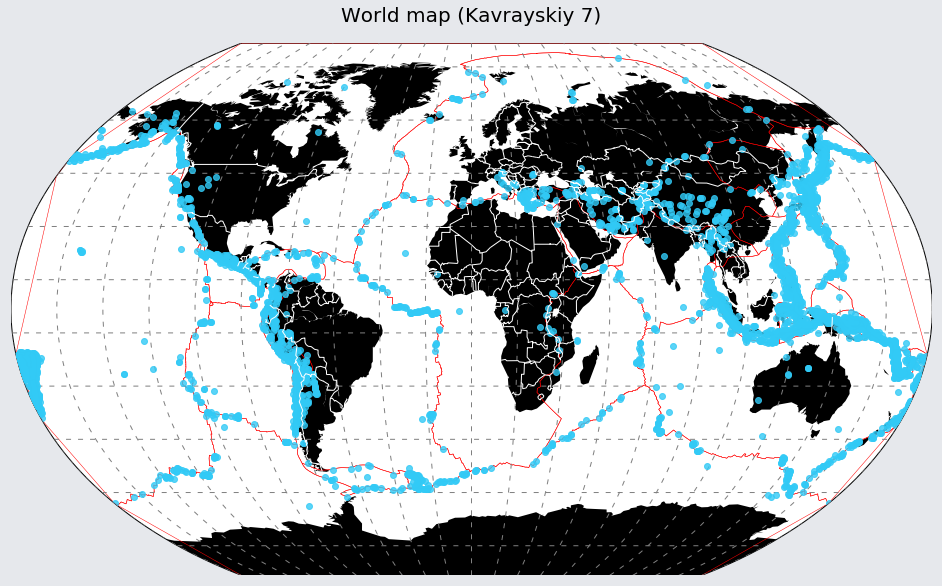

In [25]:
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0
n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'
fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

lats = a[:,0]
lons = a[:,1]
x1, y1 = m(lons, lats) # Convert coords to projected place in figure
m.scatter(x1, y1, 
          marker="o", 
          color='#32caf6',
          zorder=10, 
          alpha=0.8)
m.readshapefile('PB2002_plates', 
                name='tectonic_plates', 
                drawbounds=True, 
                color='red')
m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', 
                 lake_color='white')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

title = plt.title('World map (Kavrayskiy 7)', 
                  fontsize=20)

title.set_y(1.03) # Move the title a bit for niceness
plt.show()

#print(d.shape)

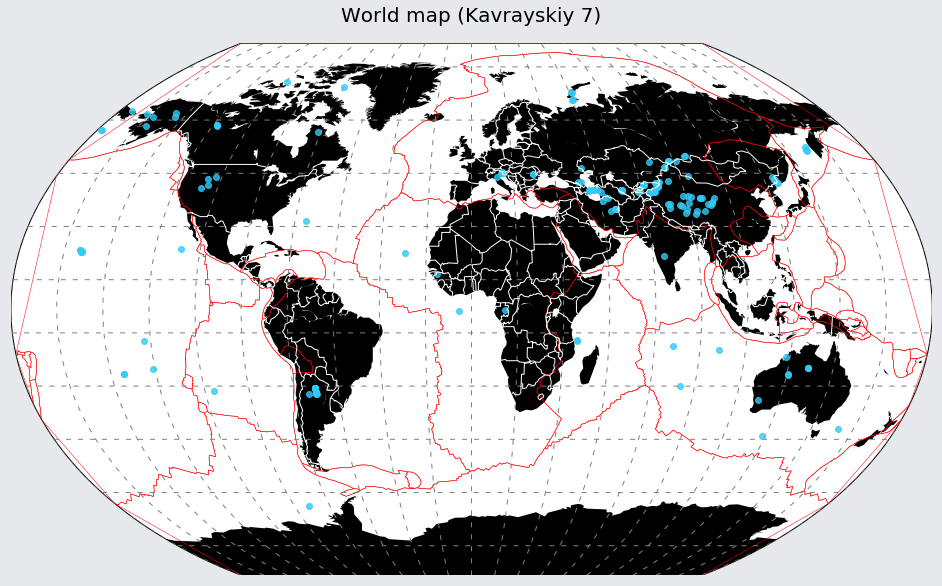

(5131, 2)


In [37]:
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0
n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'
fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

lats = jarak[:,0]
lons = jarak[:,1]
x1, y1 = m(lons, lats) # Convert coords to projected place in figure
m.scatter(x1, y1, 
          marker="o", 
          color='#32caf6',
          zorder=10, 
          alpha=0.8)
m.readshapefile('PB2002_plates', 
                name='tectonic_plates', 
                drawbounds=True, 
                color='red')
m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', 
                 lake_color='white')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

title = plt.title('World map (Kavrayskiy 7)', 
                  fontsize=20)

title.set_y(1.03) # Move the title a bit for niceness
plt.show()

print(d.shape)

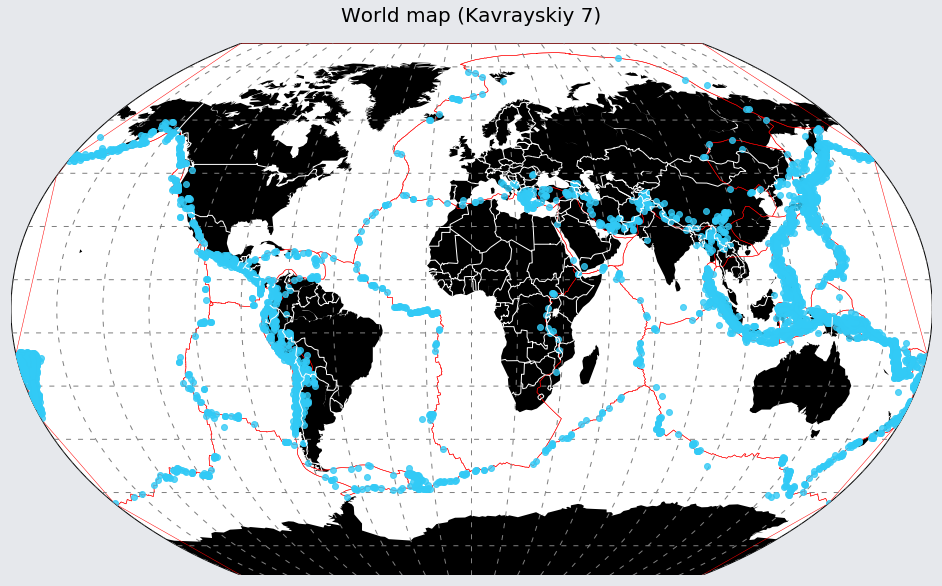

(5131, 2)


In [24]:
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0
n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'
fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

lats = d[:,0]
lons = d[:,1]
x1, y1 = m(lons, lats) # Convert coords to projected place in figure
m.scatter(x1, y1, 
          marker="o", 
          color='#32caf6',
          zorder=10, 
          alpha=0.8)
m.readshapefile('PB2002_plates', 
                name='tectonic_plates', 
                drawbounds=True, 
                color='red')
m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', 
                 lake_color='white')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

title = plt.title('World map (Kavrayskiy 7)', 
                  fontsize=20)

title.set_y(1.03) # Move the title a bit for niceness
plt.show()

print(d.shape)

In [39]:
lol = a[:,0]
jumlah_total_cluster = lol.shape[0]
print(jumlah_total_cluster)

5304


In [45]:
#HR (robust)
for window in range(1,27):
    wkwk = np.zeros((jumlah_total_cluster-window, window+1))
    wkwk.shape
    for i in range(jumlah_total_cluster-window):
        wkwk[i, :] = lol[i:i+window+1]
    batas = jumlah_total_cluster//5
    x_train = wkwk[:- batas, :-1]
    y_train = wkwk[:- batas, -1]
    x_test = wkwk[- batas:, :-1]
    y_test = wkwk[- batas:, -1]
    
    from sklearn.linear_model import HuberRegressor
    dukun = HuberRegressor()
    dukun.fit(x_train, y_train)
    y_pred = dukun.predict(x_test)
    
    #plt.plot(y_pred[:], 'g')
    #plt.plot(y_test[:], 'r')
    print (window, np.average(abs(y_pred-y_test)))

1 24.833101022664106
2 24.70314581545079
3 24.645326315369342
4 24.558272433160386
5 24.52501266002374
6 24.581090895833057
7 24.631028461090043
8 24.655260367121624
9 24.618370313607414
10 24.635422812779293
11 24.633561515946464
12 24.656454900768388
13 24.65917071089158
14 24.662818224274375
15 24.664677844298826
16 24.592256637046706
17 24.615676337880586
18 24.619126458224603
19 24.612744721467823
20 24.625265966737754
21 24.621888908808923
22 24.620742807013578
23 24.57037497019527
24 24.564857586379453
25 24.57089847764829
26 24.56293707368471


In [41]:
#linier regresi
for window in range(1,60):
    wkwk = np.zeros((jumlah_total_cluster-window, window+1))
    wkwk.shape
    for i in range(jumlah_total_cluster-window):
        wkwk[i, :] = lol[i:i+window+1]
    batas = jumlah_total_cluster//5
    x_train = wkwk[:-batas, :-1]
    y_train = wkwk[:-batas, -1]
    x_test = wkwk[-batas:, :-1]
    y_test = wkwk[-batas:, -1]
    
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    #plt.plot(y_pred[:], 'g')
    #plt.plot(y_test[:], 'r')
    print (window, np.average(abs(y_pred-y_test)))

1 24.99429679117465
2 24.883728591784056
3 24.842141920789587
4 24.776122335083187
5 24.731657444455845
6 24.792645046099278
7 24.83055697045775
8 24.848946823835487
9 24.80825634061421
10 24.825980263227503
11 24.82183615813263
12 24.84193678097803
13 24.857050138268228
14 24.84738661157887
15 24.853124416642835
16 24.78144067713615
17 24.804134529497844
18 24.81411856112311
19 24.804615085736287
20 24.81270750943621
21 24.81308676471326
22 24.811888592690998
23 24.764204731341838
24 24.760418599751
25 24.75983549216548
26 24.75422401283994
27 24.757728731341448
28 24.756090687887205
29 24.76084132445866
30 24.780174112793322
31 24.787794114009397
32 24.793390703227438
33 24.849254904396645
34 24.845523026527474
35 24.84188724883561
36 24.871178048252403
37 24.852360477282094
38 24.84189337055221
39 24.858799204925603
40 24.862263150937004
41 24.848516761687616
42 24.863551069191068
43 24.850547728164752
44 24.847289439688144
45 24.840506130902956
46 24.829181558799863
47 24.821976222

In [14]:
#lassso
for window in range(1,49):
    wkwk = np.zeros((jumlah_total_cluster-window, window+1))
    wkwk.shape
    for i in range(jumlah_total_cluster-window):
        wkwk[i, :] = lol[i:i+window+1]
    batas = jumlah_total_cluster//5
    x_train = wkwk[:-batas, :-1]
    y_train = wkwk[:-batas, -1]
    x_test = wkwk[-batas:, :-1]
    y_test = wkwk[-batas:, -1]

    from sklearn import linear_model
    lasso = linear_model.Lasso(alpha=0.1)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)

#plt.plot(y_pred[:], 'g')
#plt.plot(y_test[:], 'r')
    print (window, np.average(abs(y_pred-y_test)))

1 110.96974109896854
2 110.45846700460007
3 110.40503364857562
4 109.86958540680797
5 109.83390913313444
6 109.76330461195974
7 109.79120511113194
8 109.78580757878305
9 109.51192687123314
10 109.50658013694914
11 109.40767935114056
12 109.52206639757766
13 109.53591327809706
14 109.52377158048338
15 109.21755656019693
16 109.24662641614506
17 109.22157355575715
18 109.21471449952682
19 109.20711452300527
20 109.20541552974962
21 109.15368729748525
22 109.06993317003722
23 108.99927617195254
24 108.9991530155532
25 109.03015186227523
26 109.07379226620453
27 109.12324042995228
28 109.13930902657525
29 109.10506864374806
30 109.09732707647787
31 109.10047860276335
32 109.21332046384359
33 109.18893676007079
34 109.19569579424771
35 109.25103451354701
36 109.25538908466596
37 109.25440278809138
38 109.2650178768849
39 109.32280169153383
40 109.41262341895096
41 109.47521100460149
42 109.42615531735073
43 109.4700386071764
44 109.46912467013804
45 109.41682191912433
46 109.41116916261613


In [42]:
#BayesianRidge
for window in range(1,60):
    wkwk = np.zeros((jumlah_total_cluster-window, window+1))
    wkwk.shape
    for i in range(jumlah_total_cluster-window):
        wkwk[i, :] = lol[i:i+window+1]
    batas = jumlah_total_cluster//5
    x_train = wkwk[:-batas, :-1]
    y_train = wkwk[:-batas, -1]
    x_test = wkwk[-batas:, :-1]
    y_test = wkwk[-batas:, -1]

    from sklearn import linear_model
    BR = linear_model.BayesianRidge()
    BR.fit(x_train, y_train)
    y_pred = BR.predict(x_test)

#plt.plot(y_pred[:], 'g')
#plt.plot(y_test[:], 'r')
    print (window, np.average(abs(y_pred-y_test)))

1 24.99986975426678
2 24.894358331734956
3 24.859774459047035
4 24.802772093629947
5 24.765795885735415
6 24.824084063283816
7 24.865128593354406
8 24.887567386958747
9 24.854092813038893
10 24.873435133986437
11 24.873075635250046
12 24.89586204145437
13 24.91436856333034
14 24.91101880420086
15 24.922424129072194
16 24.865539885094172
17 24.887160462981978
18 24.90105850790169
19 24.894219661836885
20 24.9043006331549
21 24.905435428235077
22 24.90891523896339
23 24.871161691515123
24 24.872013049366206
25 24.876472911471698
26 24.874639699318593
27 24.882508695320364
28 24.884592963845847
29 24.89305062669185
30 24.911715302082737
31 24.923285291844195
32 24.93298878022369
33 24.97730156420925
34 24.977309949724468
35 24.964987586590834
36 24.982608717886382
37 24.970566556314253
38 24.966894524375654
39 24.977524467816163
40 24.985103553003874
41 24.97839196867914
42 24.98830701680517
43 24.976393623699085
44 24.97666707116941
45 24.97667467061145
46 24.97463335083422
47 24.9741224

In [43]:
#Ridge
for window in range(1,60):
    wkwk = np.zeros((jumlah_total_cluster-window, window+1))
    wkwk.shape
    for i in range(jumlah_total_cluster-window):
        wkwk[i, :] = lol[i:i+window+1]
    batas = jumlah_total_cluster//5
    x_train = wkwk[:-batas, :-1]
    y_train = wkwk[:-batas, -1]
    x_test = wkwk[-batas:, :-1]
    y_test = wkwk[-batas:, -1]
    
    from sklearn import linear_model
    #rid = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
    rid = linear_model.Ridge(alpha=.5)
    rid.fit(x_train, y_train)
    y_pred = rid.predict(x_test)
    #Ridge(alpha=0.5)

    #plt.plot(y_pred[:], 'g')
    #plt.plot(y_test[:], 'r')
    print (window, np.average(abs(y_pred-y_test)))

1 24.994296844334304
2 24.88372864380078
3 24.84214197698563
4 24.77612240118177
5 24.731657512456405
6 24.79264510056056
7 24.830557020552785
8 24.848946873360703
9 24.808256393509083
10 24.825980313087978
11 24.82183620970767
12 24.841936828827272
13 24.85705018566822
14 24.847386660758165
15 24.853124465516522
16 24.781440735003912
17 24.80413458344829
18 24.814118613405135
19 24.804615136538626
20 24.812707557447933
21 24.81308680984298
22 24.811888638022946
23 24.764204782639943
24 24.76041864885937
25 24.75983553860299
26 24.754224063308893
27 24.757728781109197
28 24.756090741466878
29 24.76084137492347
30 24.780174161210358
31 24.78779416079421
32 24.79339074945994
33 24.849254949959143
34 24.845523072483836
35 24.841887288064825
36 24.87117808349517
37 24.852360517513635
38 24.841893412011117
39 24.858799236349366
40 24.86226318229133
41 24.848516793095122
42 24.863551098319046
43 24.850547764231003
44 24.847289475165123
45 24.840506165288744
46 24.8291815972494
47 24.82197625

In [44]:
#RANSACRegressor(robust)
for window in range(1,60):
    wkwk = np.zeros((jumlah_total_cluster-window, window+1))
    wkwk.shape
    for i in range(jumlah_total_cluster-window):
        wkwk[i, :] = lol[i:i+window+1]
    batas = jumlah_total_cluster//5
    x_train = wkwk[:-batas, :-1]
    y_train = wkwk[:-batas, -1]
    x_test = wkwk[-batas:, :-1]
    y_test = wkwk[-batas:, -1]
    
    from sklearn import linear_model
    ransac = linear_model.RANSACRegressor()
    ransac.fit(x_train, y_train)
    y_pred = ransac.predict(x_test)    

    #plt.plot(y_pred[:], 'g')
    #plt.plot(y_test[:], 'r')
    print (window, np.average(abs(y_pred-y_test)))


1 26.080284144182198
2 27.14124380737289
3 24.886105558956693
4 25.19738824990893
5 28.949022920042523
6 29.095160623732173
7 29.348790337535135
8 29.11492182169373
9 33.849974000240366
10 29.921494721031138
11 29.33350267591512
12 36.34059882254609
13 33.70839547587409
14 33.520355652845254
15 30.70397031522906
16 37.115864480650345
17 50.147462966538335
18 40.046456062043745
19 42.19314638044274
20 42.4276043314619
21 39.904190973080375
22 43.226922167457325
23 50.213902556691004
24 40.63885931632609
25 46.15964466237818
26 45.745243674419555
27 56.489040147356214
28 38.666902763912326
29 38.166822620940565
30 45.492789868200205
31 49.75513378157525
32 50.31423547874485
33 50.03300525240864
34 61.912343692649834
35 42.78518114499457
36 56.96701561517371
37 49.29404173592422
38 56.29240442670703
39 54.769321937338184
40 51.93118331090799
41 56.20900603189921
42 53.37659447669701
43 56.30670843882222
44 47.173316690164704
45 54.25356567579551
46 51.27645798134572
47 57.16919622480081
4

In [46]:
df = pd.read_csv('database.csv')
#df = pd.read_csv('earthquakes1970-2014.csv')
x=df.values[-35:-9,2:3].T
x.shape

(1, 26)

In [47]:
y = dukun.predict(x) #xx 15 data csv -> data 16 , terus di cek
print(y)

[-1.50165894]


In [48]:
df.values[-9:,2]

array([-43.4029, -43.481, 45.7192, 38.3754, 38.3917, 38.3777, 36.9179,
       -9.0283, 37.3973], dtype=object)